# Microlensing waveform for moving lens

## Assumption:
1. The source part of the time delay variation cannot be taken into account because they are common to both images (i.e. it can be factored into the source waveform)
2. Assume monochromatic waves to begin with

## Goal:
1. Work out the frequency and time domain waveform for both cases
2. Figure out the detection criteria and compared it with Liao et. al. (2019)


## Derivations:
Recall the lensed waveform is: 
$$
h_L(f) = F(f;t) \,h(f)
$$

The source waveform in time domain is:
$$
h(t) = A\cos(2\pi f_0 (t-t_0))
$$
Therefore the frequency domain waveform is (We just plot $f>0$ because the $-f$ part can be obtained by reflection + complex conjugate)

$$
h(f) = \frac{A}{2} \delta(f-f_0) e^{-2\pi f i t_0}
$$

Therefore the time domain, lensed waveform is:

$$
h_L(t) = \int_0^{\infty} F(f;t) \frac{A}{2} \delta(f-f_0) e^{-2\pi f i t_0} e^{2\pi i f}df + \text{C.C.}
$$
where C.C. is the complex conjugate. At the end we get:

$$
h_L(t) = F(f_0;t) \frac{A}{2} e^{2\pi f i (t-t_0)} + \text{C.C.}
$$

Because of the complex conjugate, we simply have to calculate the real part of the thing here:
$$
h_L(t) = \text{Re} \{F(f_0;t) A e^{2\pi f i (t-t_0)}\}
$$

It is tempting to just copy the results from Nakahashi et. al., but this is wrong because they normalize the time delay by a $y$ dependent factor so that the time of arrivial for the first image is always $0$. This cannot be the case for moving lens because in this situation the relative time delay between different source position matters.

Keep in mind that the time delay is:
$$
t_d \propto \frac{1}{2} \left|\vec x - \vec y\right|^2 - \psi \left(\vec x\right) + \phi \left(\vec y\right)
$$
The main difference between us and Takahashi is that they choose $\phi$ in such a way so that the first image is always $t_d=0$. Also this is different from diffraction because for diffraction we only need to determine the relative frequency evolution to determine the coherence time. But we do not want that for microlensing, therefore, we simply set a fixed $\vec y$ for $\phi(\vec y)$. This means in the geometric limit, the magnification factor will becomes:

$$
F_g(f) = |\mu_+\left(\vec x_+, \vec y(t)\right)|^{1/2}\exp(2\pi i f_0 t_d\left(\vec x_+, \vec y(t)\right) - i|\mu_-\left(\vec x_+, \vec y(t)\right)|^{1/2} \exp(2\pi i f_0 t_d\left(\vec x_-, \vec y(t)\right))
$$

Therefore, the lensed waveform becomes:

\begin{align*}
h_L(t) &= \text{Re} \{\left[|\mu_+(t)|^{1/2}\exp(2\pi i f_0 t^{(1)}_d(t)) - i|\mu_-(t)|^{1/2} \exp(2\pi i f_0 t^{(2)}_d(t)) \right] Ae^{2\pi f_0 i (t-t_0)}\}\\
&= |\mu_+(t)|^{1/2} A \cos(2\pi f_0 (t-t_0+t^{(1)}_d(t))) + |\mu_-(t)|^{1/2}A\sin(2\pi f_0 (t-t_0+t^{(2)}_d(t)))\\
\end{align*}

Let $y_0$ be the source position when the source is closest to the lens. We will normalize our time such that that time is zero.

For the microlensing model, we must first write out the source position as a function of time. In particular, we shall let:

$$
y(t) = \sqrt{y_0^2 + (t/t_E)^2}
$$
Here we have normalized the unit so that time are measured in Einstein crossing time. Since $t$ is measured in Einstein crossing time $t_E$, then frequency, should be measured in $f=\nu\,/t_E$ where $t_E$ is the Einstein crossing time.

The waveform have two things that came into play (in geometric limit)
1. The time delay frequency modulation
2. Interference between the two waves (For a fixed point in space that cannot be resolved, but if you move across the fringes you can see the spatial interference)


Free variables in the system: $M_L$, $z_L$, $z_s$, $v$, $y_0$, $H_0$, $f_0$, $A$

## Step 1: Plot some waveforms that include only the frequency modulation

We can set $A=1$, we can set $\theta_E=1$. We take $M_L \approx 50 M_\odot$, $f_0\approx 1000 \text{ Hz}$. Then we have freedom to choose how fast the lens is moving $v=1/t_E$, which in our units translate to an angular velocity, characterizing how much $\theta_E$ it travels per second. Let's do order of magnitude estimation on the parameters:

\begin{align*}
t_E = \text{164.7 days} \left(\frac{v}{300 \text{km/s}}\right)^{-1} \left(\frac{M_L}{100 M_\odot}\right)^{1/2} \left(\frac{D}{\text{1 kpc}}\right)^{1/2}
\end{align*}

\begin{align*}
t_d \approx 1.97 \text{ ms} \left(\frac{M_L}{100 M_\odot}\right)
\end{align*}

Remark: I think the $t_d$ should at least scale with $y_0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def img_pos(src_pos):
    k = np.sqrt(src_pos**2 + 4)
    return 0.5*(src_pos+k), 0.5*(src_pos-k)

In [6]:
def _time_delay(x,y):
    # Time delay normalized by 4ML
    return 0.5*(x-y)**2 - np.log(np.abs(x))

In [36]:
def td(x,y,y0):
    # Normalized time delay
    x0,_ = img_pos(y0)
    td0 = _time_delay(x0,y0)
    return _time_delay(x,y)-td0

In [46]:
def mu(y):
    k = (y*y+2)/(2*y*np.sqrt(y*y+4))
    return np.abs(0.5+k), np.abs(0.5-k)

In [47]:
def mu_rt(y):
    mu_p, mu_m = mu(y)
    return np.sqrt(mu_p), np.sqrt(mu_m)

(-1.0, 1.0)

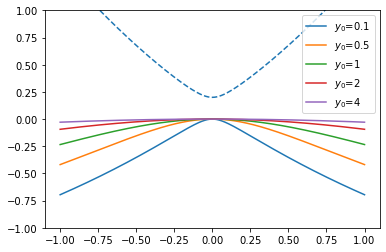

In [44]:
for y0 in [0.1,0.5,1,2,4]:
    ll =  np.linspace(-1,1,1000)
    yy = np.sqrt(y0**2 + ll**2)
    line,  = plt.plot(ll,td(img_pos(yy)[0],yy,y0),label=r'$y_0$='+f'{y0}')
    plt.plot(ll,td(img_pos(yy)[1],yy,y0),ls='--',color=line.get_color())
plt.legend()
plt.ylim(-1,1)